In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
dados = pd.read_csv('fase1.csv')
dados

,nr_aluno,nome,apelido,curso,media_entrada,curso_concluido,media_final
0,20031358,Leonardo,Pires,Psicologia,15,1,16.0
1,2022158,Raquel,Laranjeira,Informática,17,1,11.0
2,2003812,Anne,Silva,Informática,16,1,16.0
3,2022901,Patrícia,Castelo-Branco,Informática,11,1,17.0
4,2019303,Avelino,Sampaio,Comunicação,13,1,18.0
...,...,...,...,...,...,...,...
1726,2019869,Alice,Laranjeira,Informática,11,1,17.0
1727,20221093,Patrícia,Pereira,Comunicação,14,1,16.0
1728,20071160,Lucas,Capicua,Informática,12,1,20.0
1729,2020288,Pedro,Capicua,Comunicação,13,1,19.0


In [30]:
#PRIMEIRA FASE
# Para começar o trabalho, o Cientista de Dados quer-se dedicar à seguinte pergunta: 
# Existe alguma relação entre a média de entrada na licenciatura e a média de conclusão da licenciatura?

In [31]:
# Verificar se existem valores acima de 20 ou abaixo de zero na média final
valores_invalidos_final = ((dados['media_final'] > 20) | (dados['media_final'] < 0)).any()

# Verificar se existem valores acima de 20 ou abaixo de zero na média de entrada
valores_invalidos_entrada = ((dados['media_entrada'] > 20) | (dados['media_entrada'] < 0)).any()

# Exibir os resultados
print("Existem valores acima de 20 ou abaixo de zero na média final:", valores_invalidos_final)
print("Existem valores acima de 20 ou abaixo de zero na média de entrada:", valores_invalidos_entrada)

Existem valores acima de 20 ou abaixo de zero na média final: True
Existem valores acima de 20 ou abaixo de zero na média de entrada: True


In [12]:
# Calcular a correlação entre 'media_entrada' e 'media_final'
correlacao = dados['media_entrada'].corr(dados['media_final'])

# Imprimir a correlação
print("Correlação entre média de entrada e média final:", correlacao)

Correlação entre média de entrada e média final: -0.8057373456592872


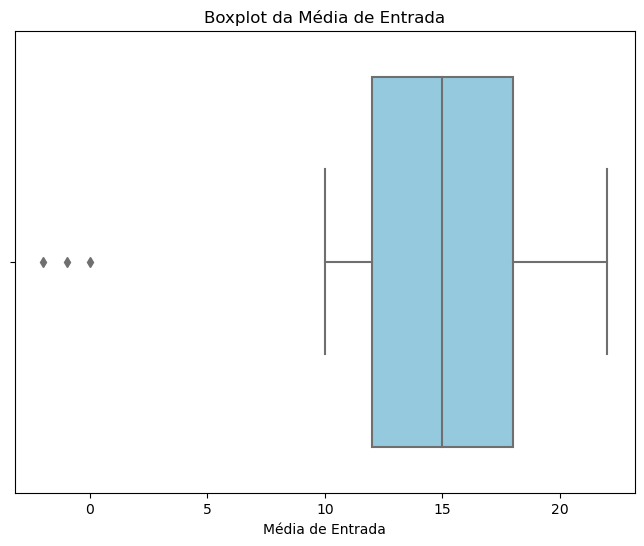

In [14]:
# Criar um boxplot para a média de entrada
plt.figure(figsize=(8, 6))
sns.boxplot(x='media_entrada', data=dados, color='skyblue')
plt.title('Boxplot da Média de Entrada')
plt.xlabel('Média de Entrada')
plt.show()


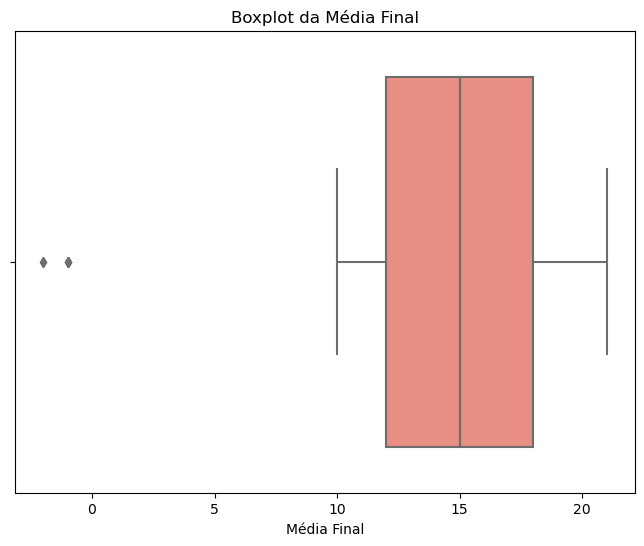

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='media_final', data=dados, color='salmon')
plt.title('Boxplot da Média Final')
plt.xlabel('Média Final')
plt.show()

In [17]:
# Calcular o intervalo interquartil (IQR) para a média de entrada
Q1_entrada = dados['media_entrada'].quantile(0.25)
Q3_entrada = dados['media_entrada'].quantile(0.75)
IQR_entrada = Q3_entrada - Q1_entrada

# Calcular os limites superior e inferior para identificar outliers
limite_inferior_entrada = Q1_entrada - 1.5 * IQR_entrada
limite_superior_entrada = Q3_entrada + 1.5 * IQR_entrada

# Selecionar os outliers para a média de entrada
outliers_entrada = dados[(dados['media_entrada'] < limite_inferior_entrada) | (dados['media_entrada'] > limite_superior_entrada)]

In [18]:
print("Outliers para a média de entrada:")
print(outliers_entrada[['nr_aluno', 'nome', 'apelido', 'curso', 'media_entrada']])

Outliers para a média de entrada:
    nr_aluno           nome     apelido        curso  media_entrada
25   2003594  Michaelangelo  Laranjeira  Comunicação              0
58  20201046         Miguel       Silva   Psicologia             -1
64   2019514          Diana     Sampaio  Informática             -2


In [20]:
# Calcular o intervalo interquartil (IQR) para a média final
Q1_final = dados['media_final'].quantile(0.25)
Q3_final = dados['media_final'].quantile(0.75)
IQR_final = Q3_final - Q1_final

# Calcular os limites superior e inferior para identificar outliers
limite_inferior_final = Q1_final - 1.5 * IQR_final
limite_superior_final = Q3_final + 1.5 * IQR_final

# Selecionar os outliers para a média final
outliers_final = dados[(dados['media_final'] < limite_inferior_final) | (dados['media_final'] > limite_superior_final)]


In [21]:
print("\nOutliers para a média final:")
print(outliers_final[['nr_aluno', 'nome', 'apelido', 'curso', 'media_final']])


Outliers para a média final:
    nr_aluno    nome   apelido        curso  media_final
35    202245     Rui     Pires  Informática         -2.0
38   2007469    Nuno  da Silva   Psicologia         -1.0
41  20071679   Jorge   Sampaio  Comunicação         -1.0
46  20211328     Ana   Sampaio  Informática         -1.0
57   2007691  Miguel     Silva  Informática         -2.0
59  20221456   Lucas     Silva  Informática         -1.0


In [28]:
df_sem_outliers_entrada = dados[(dados['media_entrada'] >= limite_inferior_entrada) & (dados['media_entrada'] <= limite_superior_entrada)]
df_sem_outliers_final = df_sem_outliers_entrada[(df_sem_outliers_entrada['media_final'] >= limite_inferior_final) & (df_sem_outliers_entrada['media_final'] <= limite_superior_final)]

In [29]:
print(df_sem_outliers_final)

        nr_aluno      nome         apelido        curso  media_entrada  \
0       20031358  Leonardo           Pires   Psicologia             15   
1        2022158    Raquel      Laranjeira  Informática             17   
2        2003812      Anne           Silva  Informática             16   
3        2022901  Patrícia  Castelo-Branco  Informática             11   
4        2019303   Avelino         Sampaio  Comunicação             13   
...          ...       ...             ...          ...            ...   
1726     2019869     Alice      Laranjeira  Informática             11   
1727    20221093  Patrícia         Pereira  Comunicação             14   
1728    20071160     Lucas         Capicua  Informática             12   
1729     2020288     Pedro         Capicua  Comunicação             13   
1730  2019163820     Diana        da Silva  Comunicação             13   

      curso_concluido  media_final  
0                   1         16.0  
1                   1         11.0  


In [32]:
df_sem_outliers_final.to_csv('dados_limpos.csv', index=False)